# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'appid=' + weather_api_key + '&q=' + city
    time.sleep(2)
   # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | oktyabrskiy
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | save
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | arlit
Processing Record 8 of Set 1 | saint-augustin
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | karamea
City not found. Skipping...
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | issoire
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | narsaq
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | kishi
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | carlsbad
Processing Record 21 of Set 1 | santa fe
Processing Record 22 of Se

Processing Record 36 of Set 4 | yenagoa
Processing Record 37 of Set 4 | dikson
Processing Record 38 of Set 4 | taft
Processing Record 39 of Set 4 | christchurch
Processing Record 40 of Set 4 | oktyabrskoye
Processing Record 41 of Set 4 | esperance
Processing Record 42 of Set 4 | salalah
Processing Record 43 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 44 of Set 4 | chuy
Processing Record 45 of Set 4 | nairobi
Processing Record 46 of Set 4 | luderitz
Processing Record 47 of Set 4 | ilulissat
Processing Record 48 of Set 4 | zambezi
Processing Record 49 of Set 4 | lasa
Processing Record 0 of Set 5 | tuktoyaktuk
Processing Record 1 of Set 5 | ribeira grande
Processing Record 2 of Set 5 | bambous virieux
Processing Record 3 of Set 5 | koosa
Processing Record 4 of Set 5 | coldwater
Processing Record 5 of Set 5 | bud
Processing Record 6 of Set 5 | marcona
City not found. Skipping...
Processing Record 7 of Set 5 | dunedin
Processing Record 8 of Set 5 | saint-franco

Processing Record 25 of Set 8 | bindura
Processing Record 26 of Set 8 | valdivia
Processing Record 27 of Set 8 | geraldton
Processing Record 28 of Set 8 | pacific grove
Processing Record 29 of Set 8 | makubetsu
Processing Record 30 of Set 8 | verdalsora
City not found. Skipping...
Processing Record 31 of Set 8 | lahij
Processing Record 32 of Set 8 | havelock
Processing Record 33 of Set 8 | cubuk
Processing Record 34 of Set 8 | gubkinskiy
Processing Record 35 of Set 8 | katsuura
Processing Record 36 of Set 8 | rio grande
Processing Record 37 of Set 8 | mastic beach
Processing Record 38 of Set 8 | caucaia
Processing Record 39 of Set 8 | hisor
Processing Record 40 of Set 8 | tura
Processing Record 41 of Set 8 | nikolayevsk-na-amure
Processing Record 42 of Set 8 | viedma
Processing Record 43 of Set 8 | urumqi
Processing Record 44 of Set 8 | gasa
Processing Record 45 of Set 8 | udachnyy
Processing Record 46 of Set 8 | ancud
Processing Record 47 of Set 8 | camacha
Processing Record 48 of Set

Processing Record 17 of Set 12 | yeletskiy
City not found. Skipping...
Processing Record 18 of Set 12 | caluquembe
Processing Record 19 of Set 12 | kununurra
Processing Record 20 of Set 12 | ola
Processing Record 21 of Set 12 | youghal
Processing Record 22 of Set 12 | serowe
Processing Record 23 of Set 12 | nemuro
Processing Record 24 of Set 12 | road town
Processing Record 25 of Set 12 | jilib
Processing Record 26 of Set 12 | roald
Processing Record 27 of Set 12 | ndende
Processing Record 28 of Set 12 | borama
City not found. Skipping...
Processing Record 29 of Set 12 | morehead
Processing Record 30 of Set 12 | saint anthony
Processing Record 31 of Set 12 | bay roberts
Processing Record 32 of Set 12 | viligili
City not found. Skipping...
Processing Record 33 of Set 12 | waingapu
Processing Record 34 of Set 12 | tateyama
Processing Record 35 of Set 12 | mayo
Processing Record 36 of Set 12 | kuching
Processing Record 37 of Set 12 | matara
Processing Record 38 of Set 12 | rocha
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,oktyabrskiy,54.4815,53.4710,258.44,94,100,2.99,RU,1670195803
1,puerto ayora,-0.7393,-90.3518,294.57,89,76,2.24,EC,1670195806
2,hermanus,-34.4187,19.2345,283.60,74,56,1.91,ZA,1670195808
3,save,8.0425,2.4860,300.24,70,36,3.12,BJ,1670195812
4,lebu,-37.6167,-73.6500,287.99,80,0,6.03,CL,1670195815


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,oktyabrskiy,54.4815,53.4710,258.44,94,100,2.99,RU,1670195803
1,puerto ayora,-0.7393,-90.3518,294.57,89,76,2.24,EC,1670195806
2,hermanus,-34.4187,19.2345,283.60,74,56,1.91,ZA,1670195808
3,save,8.0425,2.4860,300.24,70,36,3.12,BJ,1670195812
4,lebu,-37.6167,-73.6500,287.99,80,0,6.03,CL,1670195815


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

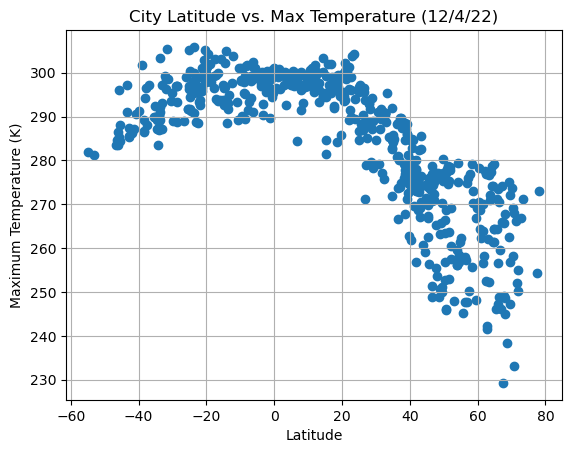

In [24]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (K)')
plt.title('City Latitude vs. Max Temperature (12/4/22)')
plt.grid()
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

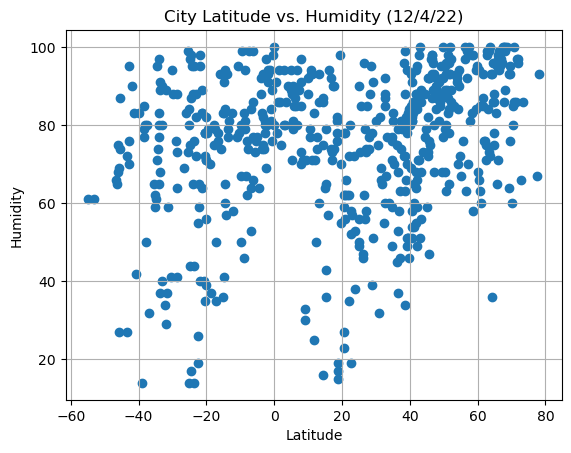

In [23]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (12/4/22)')
plt.grid()
# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

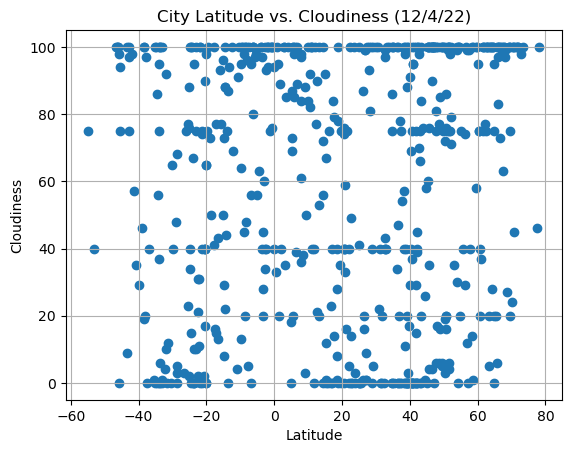

In [22]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (12/4/22)')
plt.grid()
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

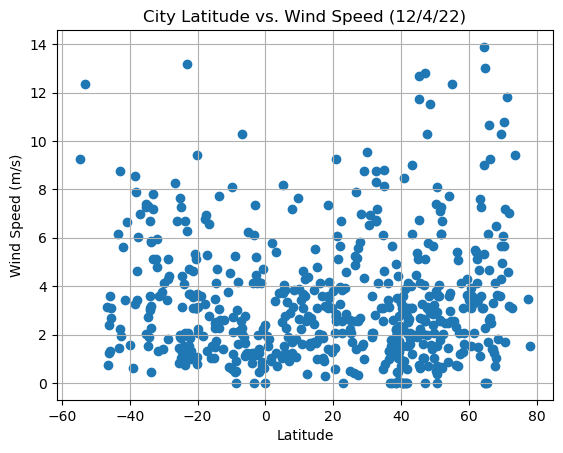

In [21]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (12/4/22)')
plt.grid()
# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,oktyabrskiy,54.4815,53.4710,258.44,94,100,2.99,RU,1670195803
3,save,8.0425,2.4860,300.24,70,36,3.12,BJ,1670195812
5,arlit,18.7369,7.3853,298.52,17,78,3.50,NE,1670195817
6,saint-augustin,51.2260,-58.6502,274.68,98,99,4.04,CA,1670195819
8,longyearbyen,78.2186,15.6401,273.06,93,100,1.54,SJ,1670195826


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto ayora,-0.7393,-90.3518,294.57,89,76,2.24,EC,1670195806
2,hermanus,-34.4187,19.2345,283.60,74,56,1.91,ZA,1670195808
4,lebu,-37.6167,-73.6500,287.99,80,0,6.03,CL,1670195815
7,port elizabeth,-33.9180,25.5701,289.44,97,100,3.60,ZA,1670195822
15,ushuaia,-54.8000,-68.3000,281.96,61,75,9.26,AR,1670195843


###  Temperature vs. Latitude Linear Regression Plot

y=-0.34x +290.59
The r-value is: 0.5431574637330638


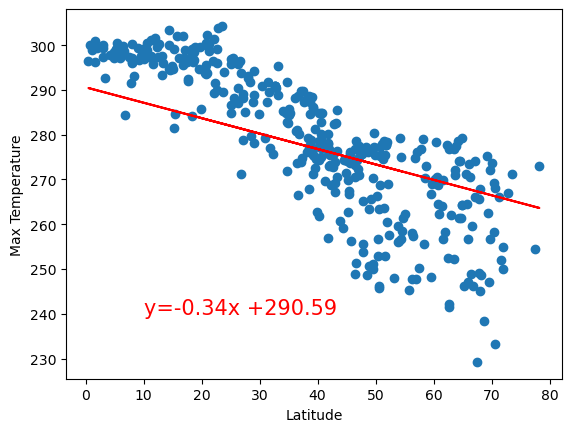

In [34]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

regress_values_northern = x_values * slope + intercept

line_eq_northern = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

plt.plot(x_values, regress_values_northern, 'r-')
plt.annotate(line_eq_northern, (10, 240), fontsize=15, color='red')
print(f'The r-value is: {rvalue**2}')

The r-value is: 0.3047160708359945


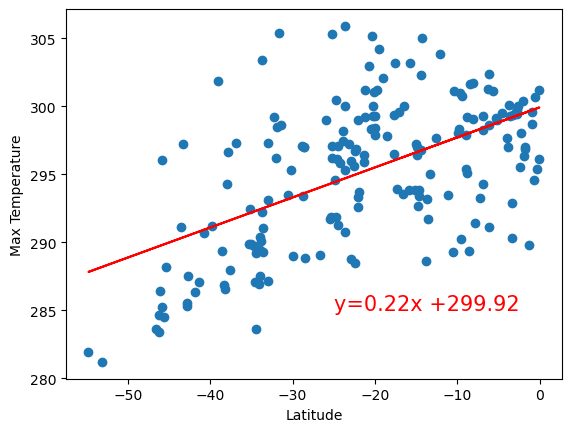

In [46]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_2, y_values_2)
x_values_2 = southern_hemi_df['Lat']
y_values_2 = southern_hemi_df['Max Temp']
plt.scatter(x_values_2, y_values_2)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

regress_values_southern = x_values_2 * slope + intercept

line_eq_southern = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

plt.plot(x_values_2, regress_values_southern, 'r-')
plt.annotate(line_eq_southern, (-25, 285), fontsize=15, color='red')
print(f'The r-value is: {rvalue**2}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear regression lines are in opposite directions for the Northern Hemisphere, which has a negative slope, and the Southern Hemisphere, which has a positive slope. The larger the latitude number gets, the further we move from the equator, hence the temperature dropping and the negative slope in the N.H., and the temperature rising and the positive slope in the S.H. The slope in the N.H. has a larger fraction value than the S.H. does, which may suggest that the temperature gets colder quicker in the N.H. Given the r-values, the relationship between latitude and temperature is a bit stronger in the N.H.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08151084708159115


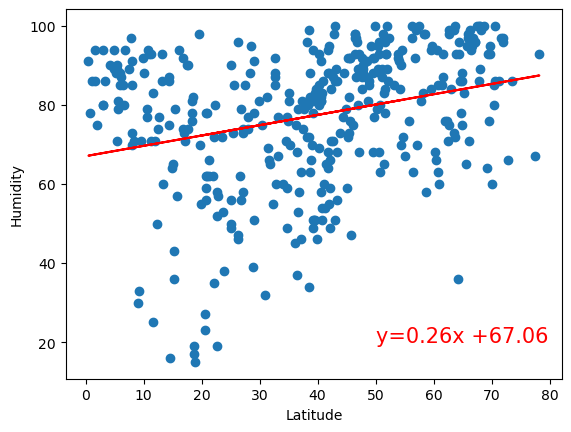

In [49]:
# Northern Hemisphere
x_values_3 = northern_hemi_df['Lat']
y_values_3 = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_3, y_values_3)
plt.scatter(x_values_3, y_values_3)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

regress_values_north_hum = x_values_3 * slope + intercept

line_eq_north_hum = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

plt.plot(x_values_3, regress_values_north_hum, 'r-')
plt.annotate(line_eq_north_hum, (50, 20), fontsize=15, color='red')
print(f'The r-value is: {rvalue**2}')

The r-value is: 0.06341698667728682


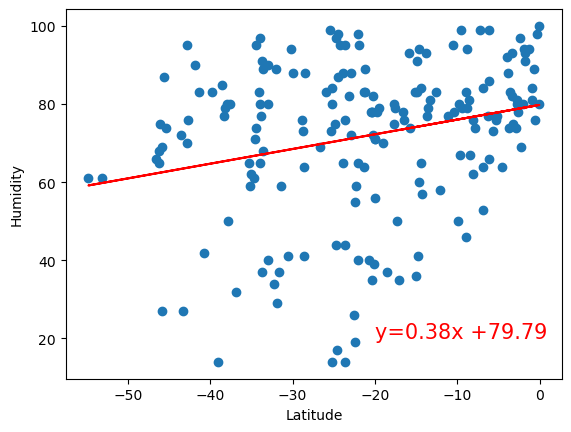

In [51]:
# Southern Hemisphere
x_values_4 = southern_hemi_df['Lat']
y_values_4 = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_4, y_values_4)
plt.scatter(x_values_4, y_values_4)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

regress_values_south_hum = x_values_4 * slope + intercept

line_eq_south_hum = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

plt.plot(x_values_4, regress_values_south_hum, 'r-')
plt.annotate(line_eq_south_hum, (-20, 20), fontsize=15, color='red')
print(f'The r-value is: {rvalue**2}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Both r-values for the relationship between latitude and humidity are close to 0 - there is a weak linear relationship between latitude and humidity in both hemispheres. Both slopes are positive and on the small side. In the N.H., humidity has a slight increase farther from the equator. In the S.H., humidity has a slight decrease farther from the equator. Data trends towards the N.H. being more humid than the S.H., but this is not a reliable rule of thumb since plenty of datapoints do not agree with those statements and the r-values are very close to 0. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.029039872540952395


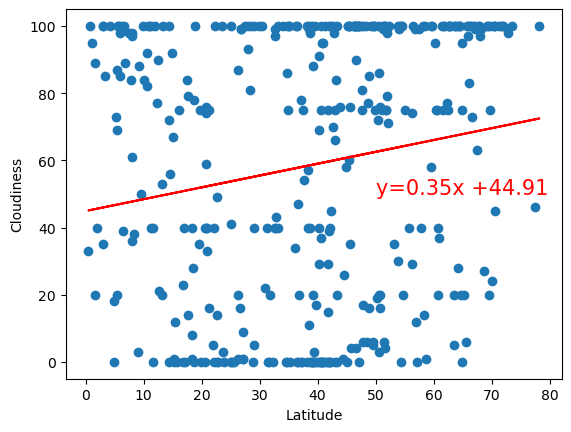

In [53]:
# Northern Hemisphere
x_values_5 = northern_hemi_df['Lat']
y_values_5 = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_5, y_values_5)
plt.scatter(x_values_5, y_values_5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

regress_values_north_cloud = x_values_5 * slope + intercept

line_eq_north_cloud = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

plt.plot(x_values_5, regress_values_north_cloud, 'r-')
plt.annotate(line_eq_north_cloud, (50, 50), fontsize=15, color='red')
print(f'The r-value is: {rvalue**2}')

The r-value is: 0.02653063759612608


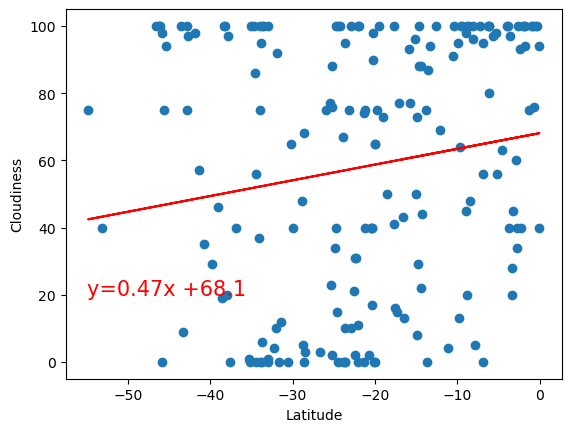

In [55]:
# Southern Hemisphere
x_values_6 = southern_hemi_df['Lat']
y_values_6 = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_6, y_values_6)
plt.scatter(x_values_6, y_values_6)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

regress_values_south_cloud = x_values_6 * slope + intercept

line_eq_south_cloud = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

plt.plot(x_values_6, regress_values_south_cloud, 'r-')
plt.annotate(line_eq_south_cloud, (-55, 20), fontsize=15, color='red')
print(f'The r-value is: {rvalue**2}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

R-values for the relationship between latitude and cloudiness are even closer to 0 than they were for humidity. There is not a reliable relationship between latitude and cloudiness in either hemisphere. Slopes are positive in both hemispheres, suggesting that it is cloudier in the N.H., but most points are not by the linear regression lines and this conclusion would not be accurate to draw. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.025747694532534525


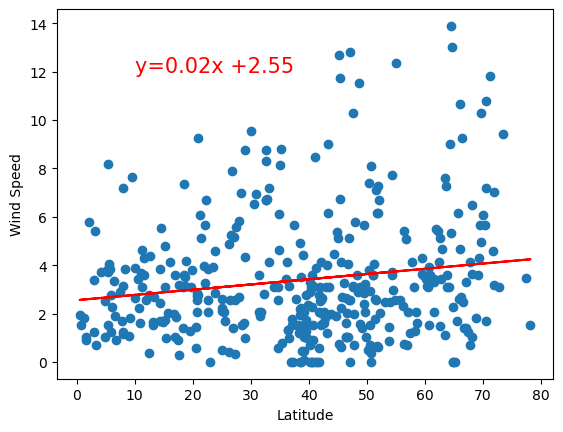

In [57]:
# Northern Hemisphere
x_values_7 = northern_hemi_df['Lat']
y_values_7 = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_7, y_values_7)
plt.scatter(x_values_7, y_values_7)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

regress_values_north_wind = x_values_7 * slope + intercept

line_eq_north_wind = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

plt.plot(x_values_7, regress_values_north_wind, 'r-')
plt.annotate(line_eq_north_wind, (10, 12), fontsize=15, color='red')
print(f'The r-value is: {rvalue**2}')

The r-value is: 0.08341038005326233


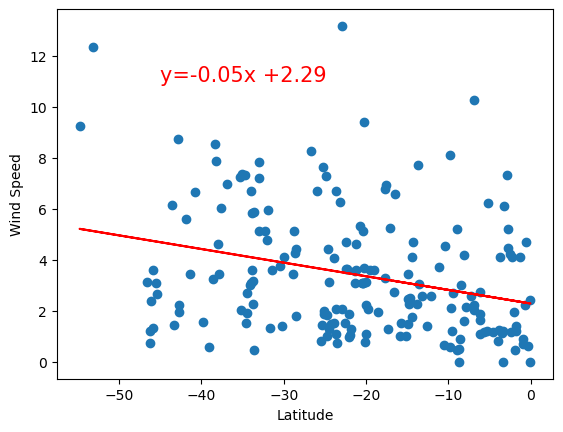

In [59]:
# Southern Hemisphere
x_values_8 = southern_hemi_df['Lat']
y_values_8 = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_8, y_values_8)
plt.scatter(x_values_8, y_values_8)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

regress_values_south_wind = x_values_8 * slope + intercept

line_eq_south_wind = 'y=' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

plt.plot(x_values_8, regress_values_south_wind, 'r-')
plt.annotate(line_eq_south_wind, (-45, 11), fontsize=15, color='red')
print(f'The r-value is: {rvalue**2}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

R-values are again very close to 0. There is not a reliable linear relationship between latitude and wind speed in either hemisphere. Data is more congregated in low wind speeds in both hemispheres. In the northern hemisphere, data gets farther apart, or wind speeds are both very low and very high, the farther you get from the equator. The same is not necessarily the case for the southern hemisphere. The S.H. also has a negative slope that is close to zero, suggesting wind speeds slightly increase further from the equator. In the N.H., wind speeds slightly increase based on the slope further from the equator. None of these conclusions would be considered rules of thumb for the data trends, since r-values show little correlation.